In [664]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import os
import csv
from tqdm import tqdm

In [665]:
# import data
df = pd.read_csv('00_df.csv', index_col=0)
pre_df = pd.read_csv('01_pre_df.csv', index_col=0)
interpolated_mv_df = pd.read_csv('02_interpolated_mv_df.csv', index_col=0)

In [666]:
df.shape

(783926, 41)

In [667]:
pre_df.shape

(783926, 37)

In [668]:
interpolated_mv_df.shape

(783926, 40)

In [669]:
# import list data

data_length_per_person = []
data_length_per_person_sum = []

with open('data_length_per_person.csv', 'r', encoding='utf-8') as f:
    rdr = csv.reader(f)
    for para in rdr:
        for i in para:
            data_length_per_person.append(int(i))


with open('data_length_per_person_sum.csv', 'r', encoding='utf-8') as f:
    rdr = csv.reader(f)
    for para in rdr:
        for i in para:
            data_length_per_person_sum.append(int(i))

In [670]:
len(data_length_per_person)   # 20169

20169

In [671]:
len(data_length_per_person_sum)   # 20169

20169

# feature를 줄여서 학습를 시도 & 성능 분석

In [672]:
interpolated_mv_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,101.6,91.5,36.80,126.8,87.30,NaN,24.8,20.7,46.5,0.30,...,10.2,NaN,327.5,83.14,0,NaN,NaN,-0.03,1,0
1,97.0,95.0,36.80,98.0,75.33,NaN,19.0,20.7,46.5,0.30,...,10.2,NaN,327.5,83.14,0,NaN,NaN,-0.03,2,0
2,89.0,99.0,36.80,122.0,86.00,NaN,22.0,20.7,46.5,0.30,...,10.2,NaN,327.5,83.14,0,NaN,NaN,-0.03,3,0
3,90.0,95.0,36.80,126.8,87.30,NaN,30.0,24.0,46.5,0.30,...,10.2,NaN,327.5,83.14,0,NaN,NaN,-0.03,4,0
4,103.0,88.5,36.80,122.0,91.33,NaN,24.5,20.7,46.5,0.28,...,10.2,NaN,327.5,83.14,0,NaN,NaN,-0.03,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783921,88.0,98.0,38.10,135.0,81.00,64.0,16.0,0.0,25.7,0.50,...,14.0,NaN,325.5,62.29,1,NaN,NaN,-0.03,31,1
783922,96.0,98.0,38.72,174.0,97.00,72.0,16.0,2.0,25.7,0.50,...,14.0,NaN,325.5,62.29,1,NaN,NaN,-0.03,32,1
783923,140.0,97.0,38.10,133.0,81.50,62.5,16.0,0.0,25.7,0.50,...,14.0,NaN,325.5,62.29,1,NaN,NaN,-0.03,33,1
783924,120.0,96.0,38.10,154.0,118.00,105.0,16.0,0.0,25.7,0.50,...,14.0,NaN,325.5,62.29,1,NaN,NaN,-0.03,34,1


In [673]:
interpolated_mv_df["Age"].min()

18.11

In [674]:
interpolated_mv_df["Age"].max()

89.0

In [675]:
interpolated_mv_df.drop(['Unit1', 'Unit2', 'HospAdmTime', 'ICULOS'], axis=1, inplace=True)

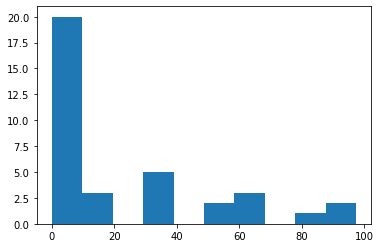

In [676]:
plt.hist(interpolated_mv_df.isnull().sum() / interpolated_mv_df.shape[0]*100)
plt.show()

In [677]:
interpolated_mv_df.isnull().sum() / interpolated_mv_df.shape[0]*100

HR                   0.001148
O2Sat                0.026916
Temp                 0.858499
SBP                  1.269125
MAP                  0.003062
DBP                 32.635733
Resp                 0.089422
BaseExcess          32.518631
HCO3                 1.298464
FiO2                36.225358
pH                  29.944663
PaCO2               32.828354
SaO2                57.334238
AST                 66.450277
BUN                  0.933634
Alkalinephos        67.339519
Calcium             13.873121
Chloride             1.309562
Creatinine           1.020377
Bilirubin_direct    96.241482
Glucose              0.931721
Lactate             56.030799
Magnesium            4.114419
Phosphate           13.209793
Potassium            1.017443
Bilirubin_total     66.958488
TroponinI           97.348857
Hct                  0.773542
Hgb                  1.154956
PTT                 17.837398
WBC                  1.506647
Fibrinogen          85.060962
Platelets            1.387248
Age       

In [678]:
base = 17

In [679]:
mv_cols = interpolated_mv_df.isnull().sum() / interpolated_mv_df.shape[0]*100 >= base

In [680]:
drop_columns_list = interpolated_mv_df.columns[mv_cols]

In [681]:
interpolated_mv_df.drop(drop_columns_list, axis=1, inplace=True)

In [682]:
interpolated_mv_df.shape

(783926, 22)

In [683]:
interpolated_mv_df.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'Resp', 'HCO3', 'BUN', 'Calcium',
       'Chloride', 'Creatinine', 'Glucose', 'Magnesium', 'Phosphate',
       'Potassium', 'Hct', 'Hgb', 'WBC', 'Platelets', 'Age', 'Gender',
       'SepsisLabel'],
      dtype='object')

# base 보다 많은 결측치 포함 columns 제거 후 데이터 전처리 진행

In [684]:
cols = interpolated_mv_df.columns
cols

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'Resp', 'HCO3', 'BUN', 'Calcium',
       'Chloride', 'Creatinine', 'Glucose', 'Magnesium', 'Phosphate',
       'Potassium', 'Hct', 'Hgb', 'WBC', 'Platelets', 'Age', 'Gender',
       'SepsisLabel'],
      dtype='object')

In [685]:
data_length_per_person_sum.insert(0,0)

In [686]:
L = len(data_length_per_person_sum)

In [687]:
s_i = 0
e_i = 1

df_patient_per_20 = pd.DataFrame(columns = cols)

for i in tqdm(range(len(data_length_per_person_sum)-1)):
    s = data_length_per_person_sum[s_i]
    e = data_length_per_person_sum[e_i]
    if e - s >= 20:
        temp = interpolated_mv_df[e-20:e]
        df_patient_per_20 = pd.concat([df_patient_per_20, temp])
    
    s_i += 1
    e_i += 1

100%|██████████| 20169/20169 [04:04<00:00, 82.64it/s]


In [688]:
df_patient_per_20

,HR,O2Sat,Temp,SBP,MAP,Resp,HCO3,BUN,Calcium,Chloride,...,Magnesium,Phosphate,Potassium,Hct,Hgb,WBC,Platelets,Age,Gender,SepsisLabel
34,102.0,91.5,36.80,103.0,75.67,24.0,46.5,18.0,9.4,85.0,...,2.1,3.5,4.2,36.7,12.3,10.2,327.5,83.14,0,0
35,99.0,89.0,37.11,113.0,96.33,26.0,46.5,18.0,9.4,85.0,...,2.1,3.5,4.2,36.7,12.3,10.2,327.5,83.14,0,0
36,97.0,89.0,36.80,110.0,72.00,29.0,46.5,18.0,9.4,85.0,...,2.1,3.5,4.2,36.7,12.3,10.2,327.5,83.14,0,0
37,110.0,89.0,36.80,108.0,90.67,24.0,46.5,18.0,9.4,85.0,...,2.1,3.5,4.2,36.7,12.3,10.2,327.5,83.14,0,0
38,108.0,89.0,36.80,139.0,102.33,26.0,46.5,18.0,9.4,85.0,...,2.1,3.5,4.2,36.7,12.3,10.2,327.5,83.14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783921,88.0,98.0,38.10,135.0,81.00,16.0,25.7,20.5,8.2,103.7,...,2.1,4.0,3.8,31.2,11.6,14.0,325.5,62.29,1,1
783922,96.0,98.0,38.72,174.0,97.00,16.0,25.7,26.0,8.2,103.7,...,2.2,3.5,3.9,27.8,11.6,14.0,325.5,62.29,1,1
783923,140.0,97.0,38.10,133.0,81.50,16.0,25.7,20.5,8.2,103.7,...,2.1,4.0,3.8,31.2,11.6,14.0,325.5,62.29,1,1
783924,120.0,96.0,38.10,154.0,118.00,16.0,25.7,20.5,8.2,103.7,...,2.1,4.0,3.8,31.2,11.6,14.0,325.5,62.29,1,1


# 스케일링

In [26]:
label = df_patient_per_20["SepsisLabel"]

In [27]:
# 정규 분포
df_patient_per_20 = (df_patient_per_20 - df_patient_per_20.mean())/df_patient_per_20.std()
df_patient_per_20.head()

,HR,O2Sat,Temp,SBP,MAP,Resp,HCO3,BUN,Calcium,Chloride,...,Magnesium,Phosphate,Potassium,Hct,Hgb,WBC,Platelets,Age,Gender,SepsisLabel
34,1.066961,-1.862253,-0.239035,-0.880981,-0.211372,0.974005,5.647835,-0.256995,1.54313,-4.004401,...,0.247702,-0.029089,0.144512,1.131153,0.975539,-0.238756,1.110786,1.255027,-1.173589,-0.18765
35,0.883750,-2.714666,0.277930,-0.400239,1.200863,1.358281,5.647835,-0.256995,1.54313,-4.004401,...,0.247702,-0.029089,0.144512,1.131153,0.975539,-0.238756,1.110786,1.255027,-1.173589,-0.18765
36,0.761609,-2.714666,-0.239035,-0.544461,-0.462239,1.934695,5.647835,-0.256995,1.54313,-4.004401,...,0.247702,-0.029089,0.144512,1.131153,0.975539,-0.238756,1.110786,1.255027,-1.173589,-0.18765
37,1.555525,-2.714666,-0.239035,-0.640610,0.813968,0.974005,5.647835,-0.256995,1.54313,-4.004401,...,0.247702,-0.029089,0.144512,1.131153,0.975539,-0.238756,1.110786,1.255027,-1.173589,-0.18765
38,1.433384,-2.714666,-0.239035,0.849690,1.611000,1.358281,5.647835,-0.256995,1.54313,-4.004401,...,0.247702,-0.029089,0.144512,1.131153,0.975539,-0.238756,1.110786,1.255027,-1.173589,-0.18765


In [28]:
df_patient_per_20["SepsisLabel"] = label

In [29]:
df_patient_per_20.shape

(351700, 22)

In [30]:
df_patient_per_20

,HR,O2Sat,Temp,SBP,MAP,Resp,HCO3,BUN,Calcium,Chloride,...,Magnesium,Phosphate,Potassium,Hct,Hgb,WBC,Platelets,Age,Gender,SepsisLabel
34,1.066961,-1.862253,-0.239035,-0.880981,-0.211372,0.974005,5.647835,-0.256995,1.543130,-4.004401,...,0.247702,-0.029089,0.144512,1.131153,0.975539,-0.238756,1.110786,1.255027,-1.173589,0
35,0.883750,-2.714666,0.277930,-0.400239,1.200863,1.358281,5.647835,-0.256995,1.543130,-4.004401,...,0.247702,-0.029089,0.144512,1.131153,0.975539,-0.238756,1.110786,1.255027,-1.173589,0
36,0.761609,-2.714666,-0.239035,-0.544461,-0.462239,1.934695,5.647835,-0.256995,1.543130,-4.004401,...,0.247702,-0.029089,0.144512,1.131153,0.975539,-0.238756,1.110786,1.255027,-1.173589,0
37,1.555525,-2.714666,-0.239035,-0.640610,0.813968,0.974005,5.647835,-0.256995,1.543130,-4.004401,...,0.247702,-0.029089,0.144512,1.131153,0.975539,-0.238756,1.110786,1.255027,-1.173589,0
38,1.433384,-2.714666,-0.239035,0.849690,1.611000,1.358281,5.647835,-0.256995,1.543130,-4.004401,...,0.247702,-0.029089,0.144512,1.131153,0.975539,-0.238756,1.110786,1.255027,-1.173589,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783921,0.211975,0.354021,1.928884,0.657393,0.152965,-0.563099,0.310561,-0.119977,-0.213667,-0.347354,...,0.247702,0.390903,-0.682452,-0.067349,0.544034,0.348151,1.091695,-0.036595,0.852085,1
783922,0.700538,0.354021,2.962814,2.532286,1.246662,-0.563099,0.310561,0.181463,-0.213667,-0.347354,...,0.569201,-0.029089,-0.475711,-0.808241,0.544034,0.348151,1.091695,-0.036595,0.852085,1
783923,3.387639,0.013056,1.928884,0.561245,0.187143,-0.563099,0.310561,-0.119977,-0.213667,-0.347354,...,0.247702,0.390903,-0.682452,-0.067349,0.544034,0.348151,1.091695,-0.036595,0.852085,1
783924,2.166230,-0.327910,1.928884,1.570802,2.682139,-0.563099,0.310561,-0.119977,-0.213667,-0.347354,...,0.247702,0.390903,-0.682452,-0.067349,0.544034,0.348151,1.091695,-0.036595,0.852085,1


In [651]:
people = df_patient_per_20.shape[0]
people

351700

# Sepsis와 non_sepsis 구분

In [ ]:
# sepsis와 non sepsis 구분

s = 0
e = 20

sepsis_df = pd.DataFrame(columns=cols)
non_sepsis_df = pd.DataFrame(columns=cols)

for _ in tqdm(range(people)):
    for i in range(17):
        is_sepsis = df_patient_per_20[s+i:s+i+3]['SepsisLabel'].sum()
        Null_count = sum(df_patient_per_20[s+i:s+i+3].isnull().sum())
        
        if is_sepsis >= 1 and Null_count == 0:
            # new DF creat
            data = df_patient_per_20[s+i:s+i+3]
            sepsis_df = pd.concat([sepsis_df, data])
            
        elif is_sepsis == 0 and Null_count == 0:
            # new DF creat
            data = df_patient_per_20[s+i:s+i+3]
            non_sepsis_df = pd.concat([non_sepsis_df, data])
        
    s += 20
    e += 20

  4%|▎         | 12492/351700 [47:36<43:49:20,  2.15it/s]

In [101]:
# sepsis_df.to_csv("03_sepsis_df_no_mv.csv", mode='w')
# non_sepsis_df.to_csv("04_non_sepsis_df_no_mv.csv", mode='w')

In [121]:
sepsis_df_no_mv = sepsis_df.drop('SepsisLabel', axis=1)
non_sepsis_df_no_mv = non_sepsis_df.drop('SepsisLabel', axis=1)

In [645]:
sepsis_df_no_mv.shape

(29100, 21)

# sepsis vs non_sepsis 데이터 수 비교

In [125]:
s_count = sepsis_df_no_mv.shape[0]//3
ns_count = non_sepsis_df_no_mv.shape[0]//3

total = s_count + ns_count

print(f'sepsis: {s_count}({round(s_count/total, 2)}) / non_sepsis: {ns_count}({round(ns_count/total, 2)})')

sepsis: 9700(0.04) / non_sepsis: 229065(0.96)


# Sepsis 훈련, 테스트 세트로 분리

In [237]:
stan = sepsis_df_no_mv.shape[0] * 0.8
stan

23280.0

In [238]:
x_train = []
x_test = []

for i in range(0, sepsis_df_no_mv.shape[0], 3):
    if i <= stan:
        temp = sepsis_df_no_mv[i: i+3].values.tolist()
        x_train.append(temp)
    else:
        temp = sepsis_df_no_mv[i: i+3].values.tolist()
        x_test.append(temp)

In [239]:
print(len(x_train), len(x_test), len(x_train) + len(x_test))

7761 1939 9700


In [240]:
y_train = [1] * len(x_train) + [0] * len(x_train)
y_test = [1] * len(x_test) + [0] * len(x_test) 

In [241]:
for i in range(0, sepsis_df_no_mv.shape[0], 3):
    if i <= stan:
        temp = non_sepsis_df_no_mv[i: i+3].values.tolist()
        x_train.append(temp)
    else:
        temp = non_sepsis_df_no_mv[i: i+3].values.tolist()
        x_test.append(temp)

In [242]:
print(len(x_train), len(x_test), len(x_train) + len(x_test))

15522 3878 19400


In [243]:
print(len(y_train), len(y_test), len(y_train) + len(y_test))

15522 3878 19400


In [649]:
cols = sepsis_df_no_mv.columns
cols

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'Resp', 'HCO3', 'BUN', 'Calcium',
       'Chloride', 'Creatinine', 'Glucose', 'Magnesium', 'Phosphate',
       'Potassium', 'Hct', 'Hgb', 'WBC', 'Platelets', 'Age', 'Gender'],
      dtype='object')

# Numpy로 변환

In [244]:
X_train = np.array(x_train)
X_test = np.array(x_test)

Y_train = np.array(y_train)
Y_test = np.array(y_test)

In [245]:
X_train.shape

(15522, 3, 21)

In [565]:
len(Y_test)

3878

# 셔플 적용

In [289]:
# Train, Test data 적용
i = np.arange(X_train.shape[0])
np.random.shuffle(i)

X_train = X_train[i]
Y_train = Y_train[i]

In [566]:
# Train, Test data 적용
i = np.arange(X_test.shape[0])
np.random.shuffle(i)

X_test = X_test[i]
Y_test = Y_test[i]

# 모델 구성

In [656]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [657]:
hidden_units = 64

model = Sequential()
model.add(LSTM(hidden_units, activation='tanh', input_shape=(3, 21)))
model.add(Dense(32, activation="relu"))
model.add(Dense(4))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_29 (LSTM)              (None, 64)                22016     
                                                                 
 dense_64 (Dense)            (None, 32)                2080      
                                                                 
 dense_65 (Dense)            (None, 4)                 132       
                                                                 
 dense_66 (Dense)            (None, 1)                 5         
                                                                 
Total params: 24,233
Trainable params: 24,233
Non-trainable params: 0
_________________________________________________________________


In [658]:
SGD = tf.keras.optimizers.SGD(learning_rate=0.04)

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=SGD, metrics=['accuracy'])

In [659]:
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=1)

In [660]:
hist = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=callback)

Epoch 1/100
437/437 [==============================] - 3s 4ms/step - loss: 0.6114 - accuracy: 0.6658 - val_loss: 0.5520 - val_accuracy: 0.7160
Epoch 2/100
437/437 [==============================] - 1s 3ms/step - loss: 0.5528 - accuracy: 0.7142 - val_loss: 0.5127 - val_accuracy: 0.7424
Epoch 3/100
437/437 [==============================] - 1s 3ms/step - loss: 0.5067 - accuracy: 0.7440 - val_loss: 0.4700 - val_accuracy: 0.7637
Epoch 4/100
437/437 [==============================] - 1s 3ms/step - loss: 0.4603 - accuracy: 0.7788 - val_loss: 0.4323 - val_accuracy: 0.7939
Epoch 5/100
437/437 [==============================] - 1s 3ms/step - loss: 0.4100 - accuracy: 0.8118 - val_loss: 0.4015 - val_accuracy: 0.8030
Epoch 6/100
437/437 [==============================] - 1s 3ms/step - loss: 0.3561 - accuracy: 0.8449 - val_loss: 0.3349 - val_accuracy: 0.8564
Epoch 7/100
437/437 [==============================] - 1s 3ms/step - loss: 0.3050 - accuracy: 0.8742 - val_loss: 0.3428 - val_accuracy: 0.8571

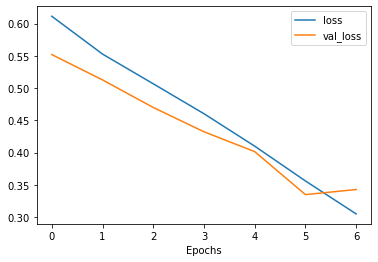

In [661]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel("Epochs")
plt.show()

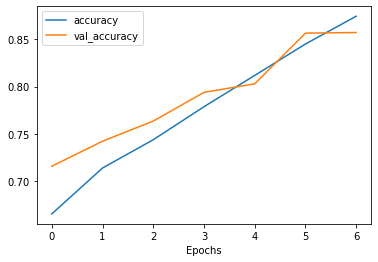

In [662]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.show()

# 성능 평가

## confusion_matrix 기준

In [652]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1_score = 2 / (1/recall + 1/precision)
    print('Confusion Matrix')
    print(confusion)
    print('정확도:{}, 정밀도:{}, 재현율:{}, f1score:{}'.format(accuracy, precision, recall, f1_score))

In [653]:
a = model.predict(x_test)

In [654]:
threshold = 0.5
b= np.where(a < threshold, 0, np.where(a > threshold, 1, a))

In [655]:
get_clf_eval(y_test, b)

Confusion Matrix
[[ 921 1018]
 [ 448 1491]]
정확도:0.6219700876740588, 정밀도:0.5942606616181746, 재현율:0.7689530685920578, f1score:0.6704136690647482


In [650]:
print(tf.__version__)

2.7.0


# 모델 저장하기

In [637]:
from keras.models import load_model

model.save('labsepsis_predict.h5')

# 모델 불러오기

In [638]:
from keras.models import load_model
modell = load_model('labsepsis_predict.h5')

In [639]:
c= modell.predict(x_test)

In [640]:
threshold = 0.5
d = np.where(c < threshold, 0, np.where(c > threshold, 1, c))

In [641]:
get_clf_eval(y_test, d)

Confusion Matrix
[[ 921 1018]
 [ 448 1491]]
정확도:0.6219700876740588, 정밀도:0.5942606616181746, 재현율:0.7689530685920578, f1score:0.6704136690647482


# 모델 아키텍처 보기

In [561]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


AttributeError: 'NoneType' object has no attribute 'create'